<a href="https://colab.research.google.com/github/ravellys/PID/blob/master/Lista5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade \#5 - MELHORAMENTO DE IMAGENS NO DOMÍNIO ESPACIAL – Contraste e Equalização
---
## Universidade Federal de Pernambuco - Departamento de Energia Nuclear
## Processamento de Imagens Digitais
### Aluno - Lucas Ravellys
---

In [72]:
# Importando bibliotecas
import skimage as sk
import matplotlib.pyplot as plt
import imageio
import numpy as np
import os
from matplotlib import image

In [73]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
# Plotagem Imagem + Histograma
from skimage import exposure

def plot_im_hist(im, bits = 8):
  fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
  ax = axes.ravel()
  ax_cdf = ax[1].twinx()


  ax[0].imshow(im, cmap='gray', vmin =  0, vmax = 2**bits-1)
  ax[0].set_title('Image')
  ax[0].axis('off')

  ax[1].hist(im.ravel(), bins=(im.max()-im.min()), range = (0,  2**bits-1), density = True)
  ax[1].set_title('Histogram')

  img_cdf, bins = exposure.cumulative_distribution(im, nbins = 2**bits )
  ax_cdf.plot(bins, img_cdf, 'r')
  ax_cdf.set_yticks([])

  ax[1].grid(True)
  plt.show()

## 1. Use a imagem PolensBaixoContraste.jpg e reproduza as imagens, histogramas e gráficos de FDAs da aula 07, explicando cada procedimento.

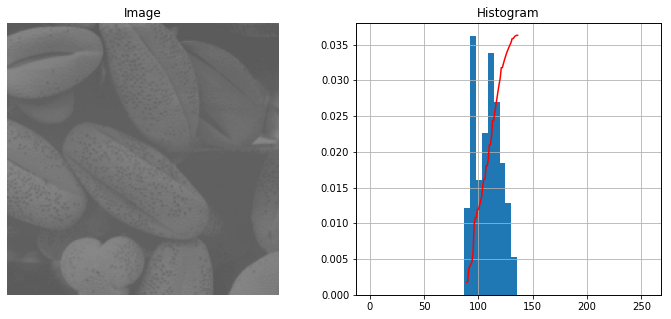

In [107]:
# importação da imagem
from skimage import io
file_ = "/content/drive/My Drive/Classroom/Processamento de Imagens Digitais/Lista 5/images/PolensBaixoContraste.jpg"
im_1 = (io.imread(file_,as_gray=True)*255).astype(int)
plot_im_hist(img_1)

### Transformação para aumento de contraste

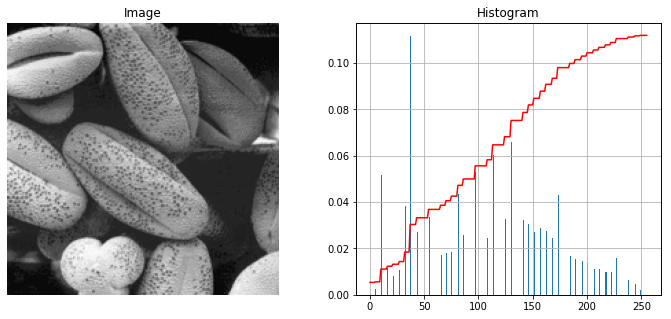

In [108]:
# transformação do pixel
def s(r,lim1,lim2,bits=8):
  if r > lim2:
    return int(2**bits - 1)
  elif r > lim1:
    return int((2**bits - 1)*(r-lim1)/(lim2-lim1))
  else:
    return 0  

# transformação da imagem
def im_alt_cont(im,lim1,lim2,bits=8):
  im_ = np.array([s(px,lim1,lim2,bits) for px in im.ravel()])
  return im_.reshape(im.shape)               

im_alto_cont = im_alt_cont(im_1, 
                           lim1 = im_1.min(),
                           lim2 = im_1.max(),
                           bits=8)
plot_im_hist(im_alto_cont)

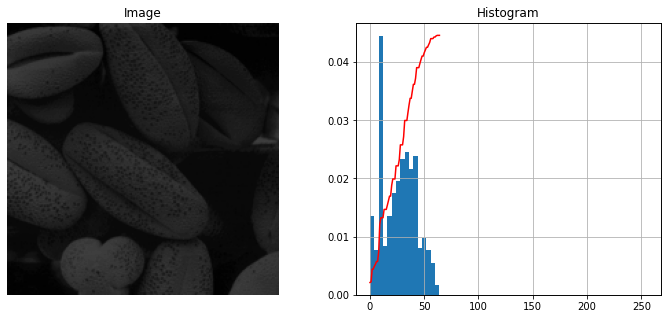

In [109]:
#altera range dos tons de cinza
def im_alt_range(im, n_min, n_max ):
  min = im.min()
  max = im.max()
  im_ = n_min +(im - min)*(n_max - n_min)/(max - min)
  return im_.astype(int)

im_escura = im_alt_range(im_alto_cont,0,64)  

plot_im_hist(im_escura)

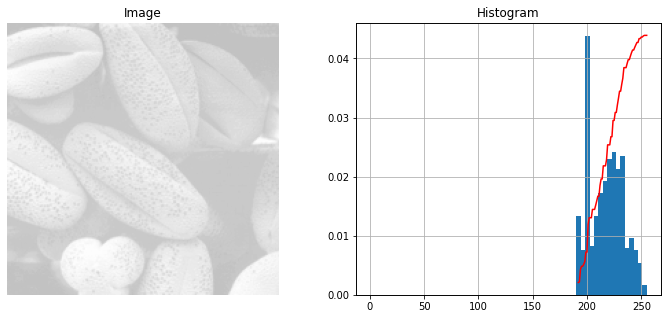

In [110]:
im_clara = im_alt_range(im_alto_cont,192,255)  

plot_im_hist(im_clara)

### Equalização de histograma

imagem de baixo contraste


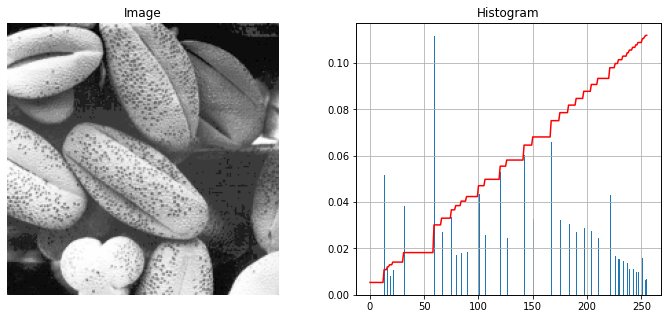

imagem de alto contraste


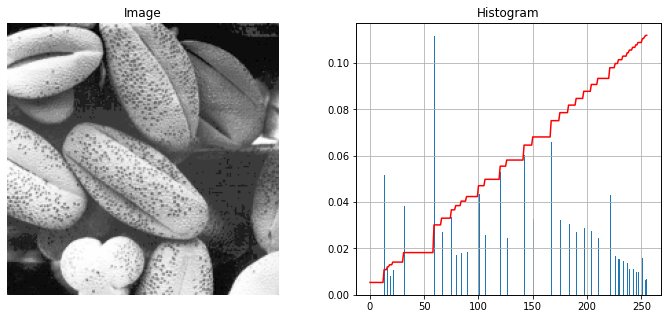

imagem escura


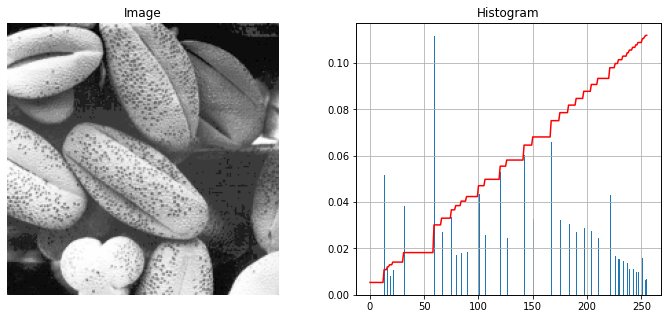

imagem clara


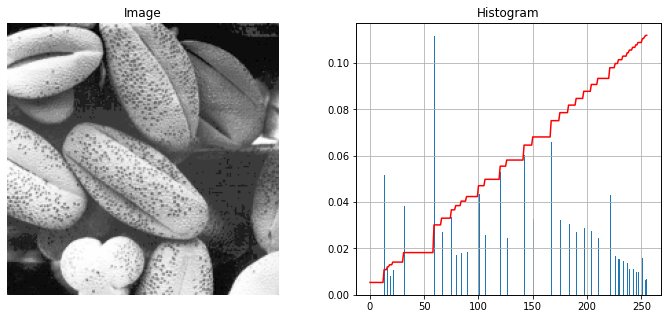

In [112]:
from skimage import exposure

im_1_eq = (255*exposure.equalize_hist(im_1)).astype(int)
im_alto_cont_eq = (255*exposure.equalize_hist(im_alto_cont)).astype(int)
im_escura_eq = (255*exposure.equalize_hist(im_escura)).astype(int)
im_clara_eq = (255*exposure.equalize_hist(im_clara)).astype(int)

print("imagem de baixo contraste")
plot_im_hist(im_1_eq)
print("imagem de alto contraste")
plot_im_hist(im_alto_cont_eq)
print("imagem escura")
plot_im_hist(im_escura_eq)
print("imagem clara")
plot_im_hist(im_clara_eq)



## 2. Obtenha uma imagem de 8 bits de baixo contraste e melhore seu aspecto, usando mais de um método. Descreva detalhadamente os métodos usados e informe as referências de onde você obteve a imagem.

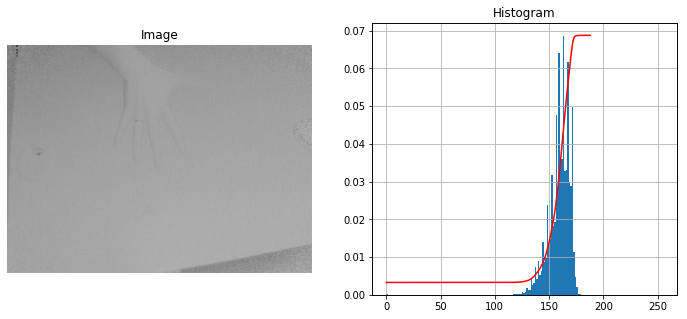

In [149]:
from urllib.request import urlopen
from PIL import Image
from skimage import color

# url da imagem utilizada
url = "https://i.stack.imgur.com/T5mQi.png"
img = Image.open(urlopen(url))

im_2_rgb = np.array(img)
im_2_rgb.shape
im_2 = (255*color.rgb2gray(im_2_rgb)).astype(int)

plot_im_hist(im_2)

imagem de baixo contraste


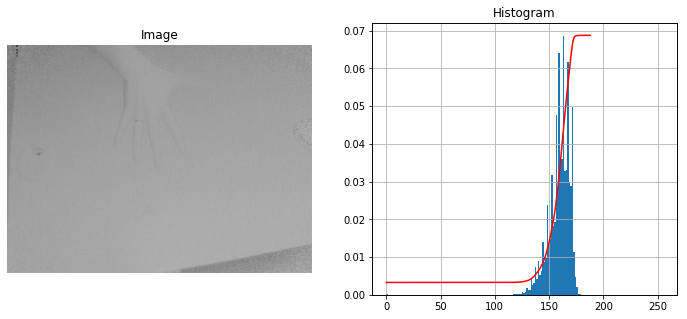

imagem de alto contraste


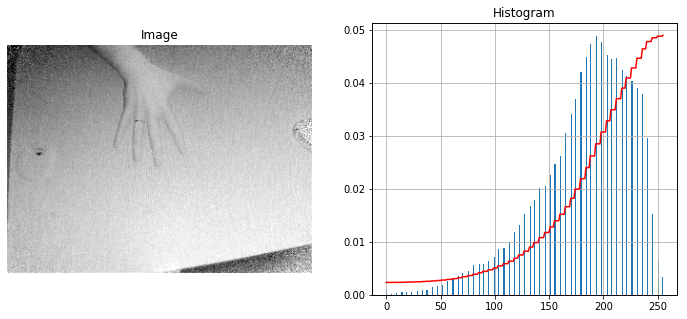

imagem escura


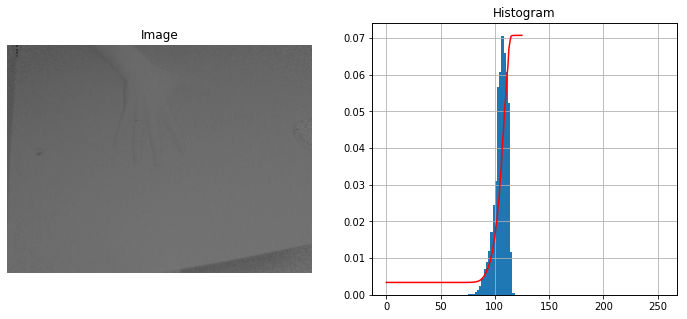

imagem clara


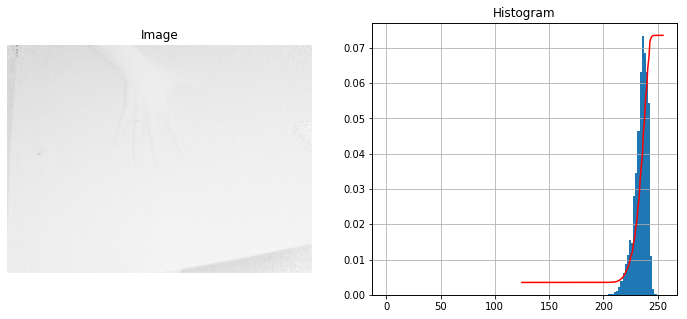

imagem equalizada


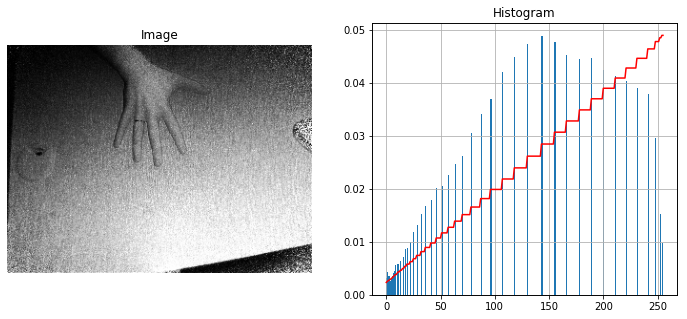

In [160]:
# aplicação das tecnicas de melhoramento de imagens

im_alto_cont = im_alt_cont(im_2, 
                           lim1 = 121,
                           lim2 = 175,
                           bits=8)
im_escura = im_alt_range(im_2,0,125)  
im_clara = im_alt_range(im_2,125,255)  
im_eq = (255*exposure.equalize_hist(im_2)).astype(int)

print("imagem de baixo contraste")
plot_im_hist(im_2)
print("imagem de alto contraste")
plot_im_hist(im_alto_cont)
print("imagem escura")
plot_im_hist(im_escura)
print("imagem clara")
plot_im_hist(im_clara)
print("imagem equalizada")
plot_im_hist(im_eq)

Como é possível observar a equalização imagem melhora muito a qualidade da imagem a ser visualizada

## 3. Repita os procedimentos da 2ª questão para uma imagem escura.

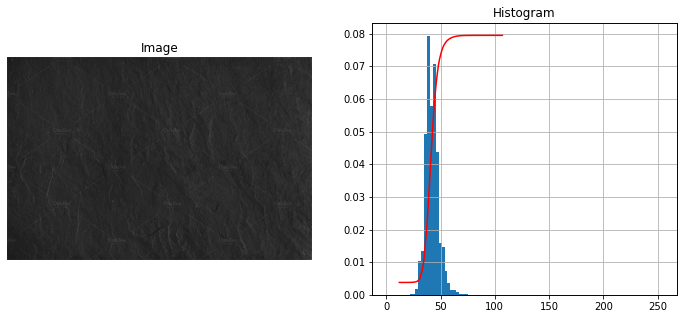

In [154]:
from urllib.request import urlopen
from PIL import Image
from skimage import color

# url da imagem utilizada
url = "https://images.template.net/wp-content/uploads/2015/08/Premium-Stone-Textured-Dark-Background.png"
img = Image.open(urlopen(url))

im_3_rgb = np.array(img)
im_3_rgb.shape
im_3 = (255*color.rgb2gray(im_3_rgb)).astype(int)

plot_im_hist(im_3)

imagem de alto contraste


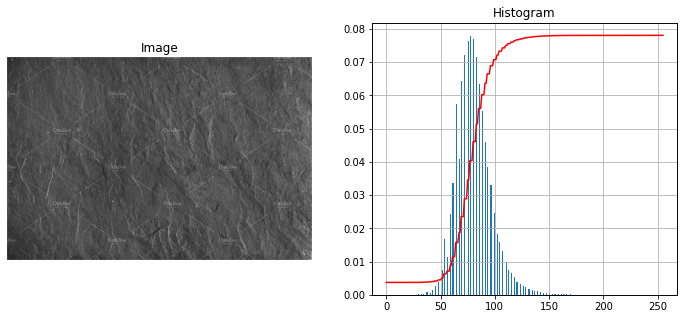

imagem clara


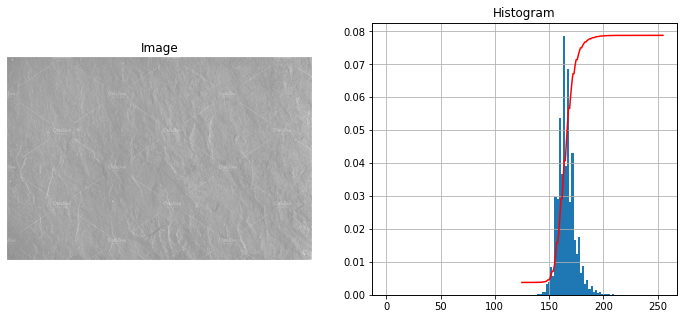

imagem equalizada


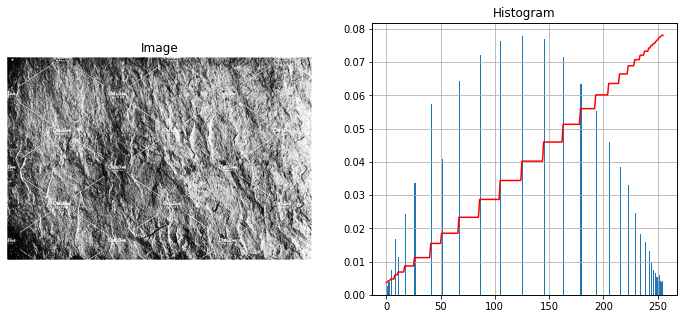

In [161]:
# aplicação das tecnicas de melhoramento de imagens

im_alto_cont = im_alt_range(im_3,0,255) 
im_clara = im_alt_range(im_3,125,255)  
im_eq = (255*exposure.equalize_hist(im_3)).astype(int)

print("imagem de alto contraste")
plot_im_hist(im_alto_cont)
print("imagem clara")
plot_im_hist(im_clara)
print("imagem equalizada")
plot_im_hist(im_eq)

## 4. Repita os procedimentos da 2ª questão para uma imagem clara.

(1080, 1080)


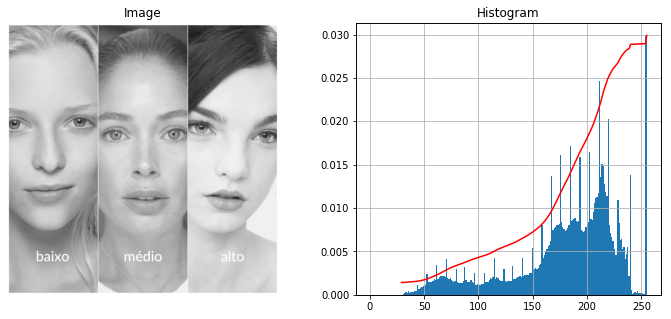

In [165]:
from urllib.request import urlopen
from PIL import Image
from skimage import color

# url da imagem utilizada
url = "https://i1.wp.com/www.thetyish.com.br/wp-content/uploads/2020/04/2-3.png"
img = Image.open(urlopen(url))

im_4 = np.array(img)
print(im_4.shape)


plot_im_hist(im_4)

imagem de alto contraste


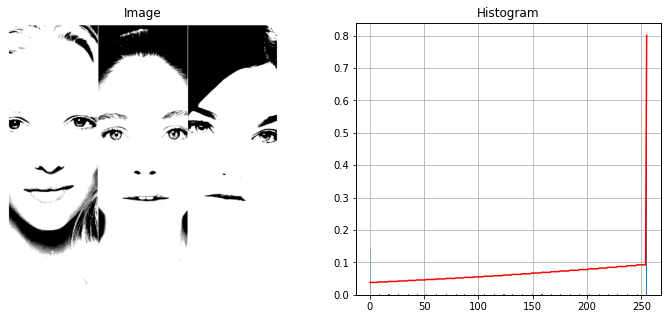

imagem escura


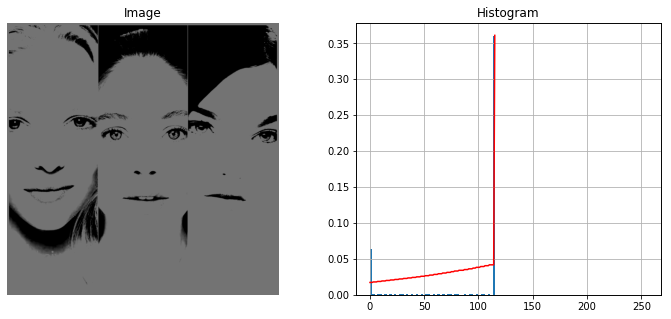

imagem equalizada


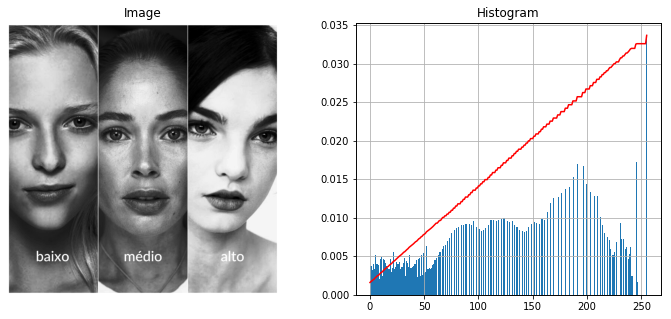

In [171]:
im_alto_cont = im_alt_cont(im_2, 
                           lim1 = 121,
                           lim2 = 150,
                           bits=8)
im_escura = im_alt_range(im_alto_cont,0,115)  
im_eq = (255*exposure.equalize_hist(im_4)).astype(int)

print("imagem de alto contraste")
plot_im_hist(im_alto_cont)
print("imagem escura")
plot_im_hist(im_escura)
print("imagem equalizada")
plot_im_hist(im_eq)